<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             20000 non-null  datetime64[ns]
 1   face_id               20000 non-null  int64         
 2   expression            20000 non-null  object        
 3   eye_openness          19500 non-null  float64       
 4   mouth_openness        19500 non-null  float64       
 5   eyebrow_raise         19500 non-null  float64       
 6   smile_intensity       19500 non-null  float64       
 7   robot_response_delay  20000 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.2+ MB
None

Missing Values:
 timestamp                 0
face_id                   0
expression                0
eye_openness            500
mouth_openness          500
eyebrow_raise           500
smile_intensity         500
robot_respon

c:\Users\sdsin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\sdsin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sdsin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sdsin\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

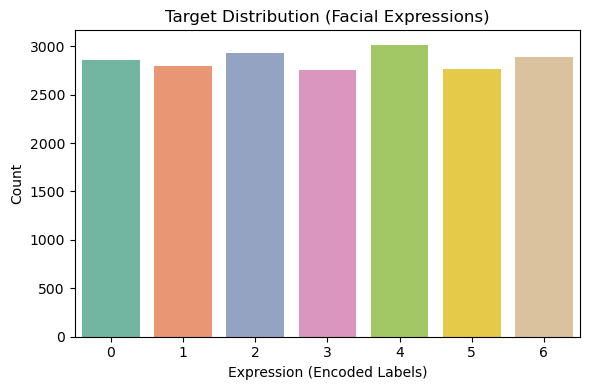

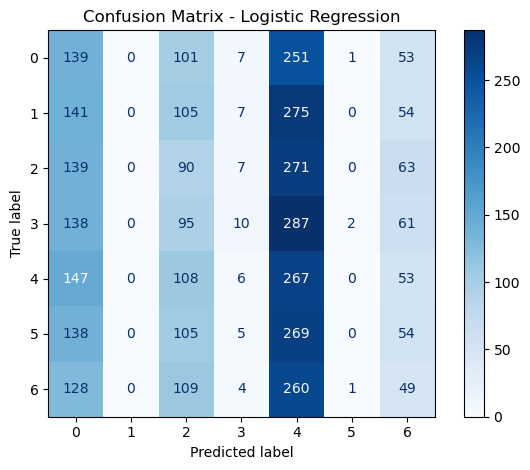

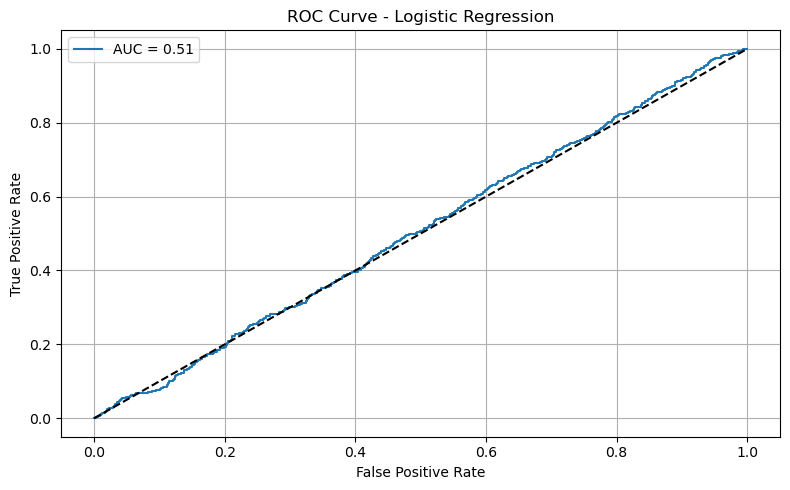

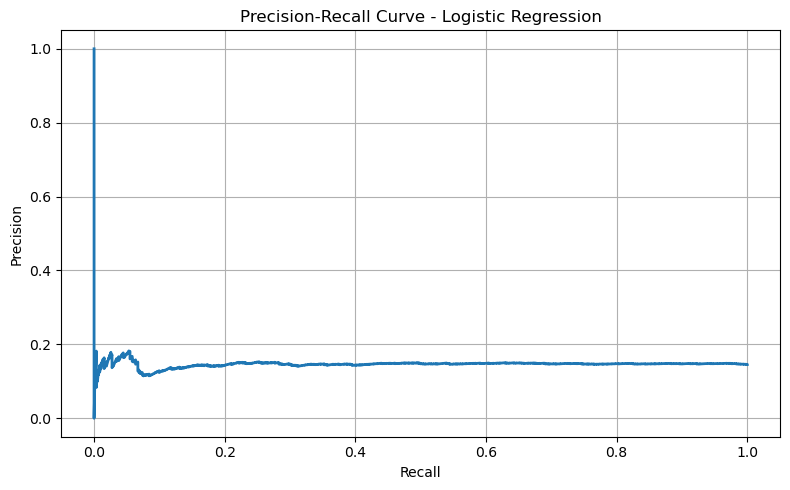

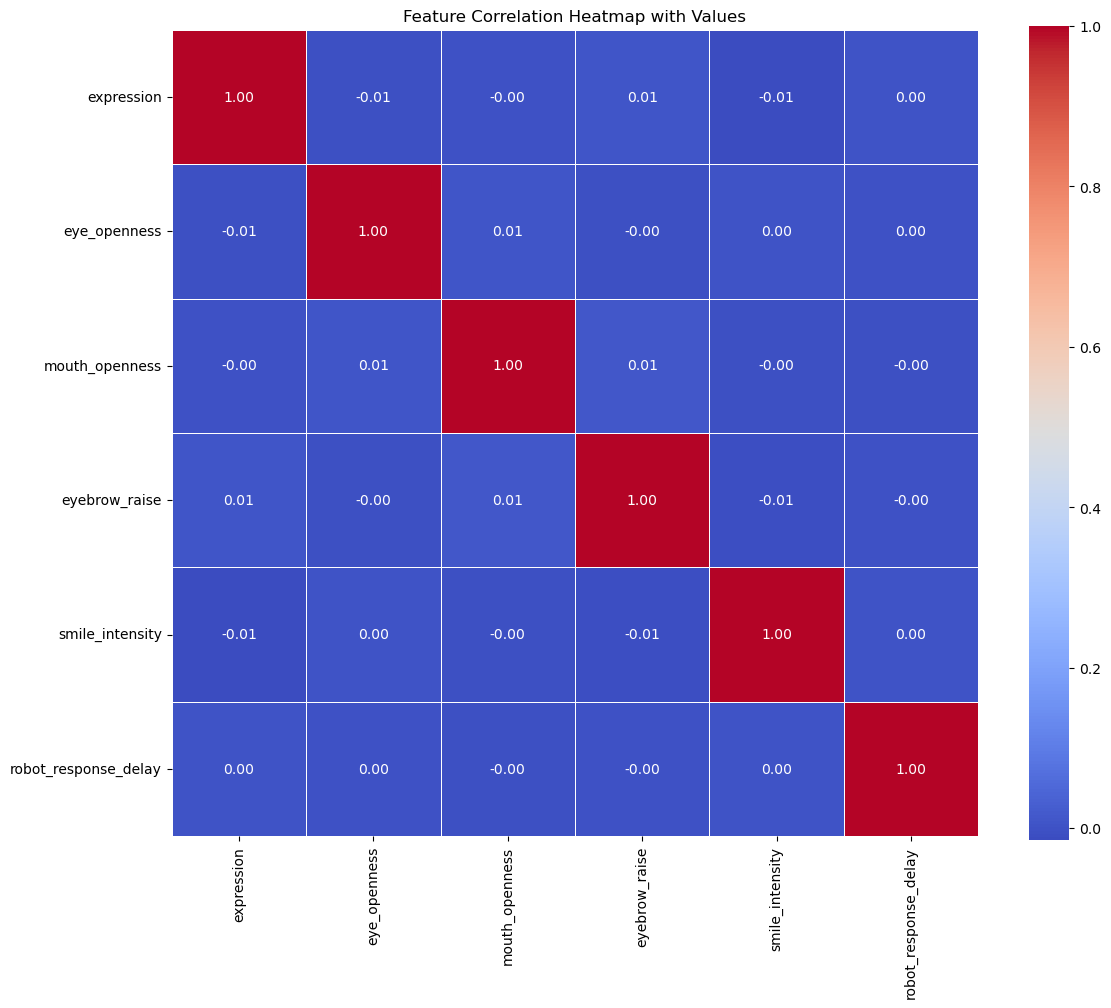

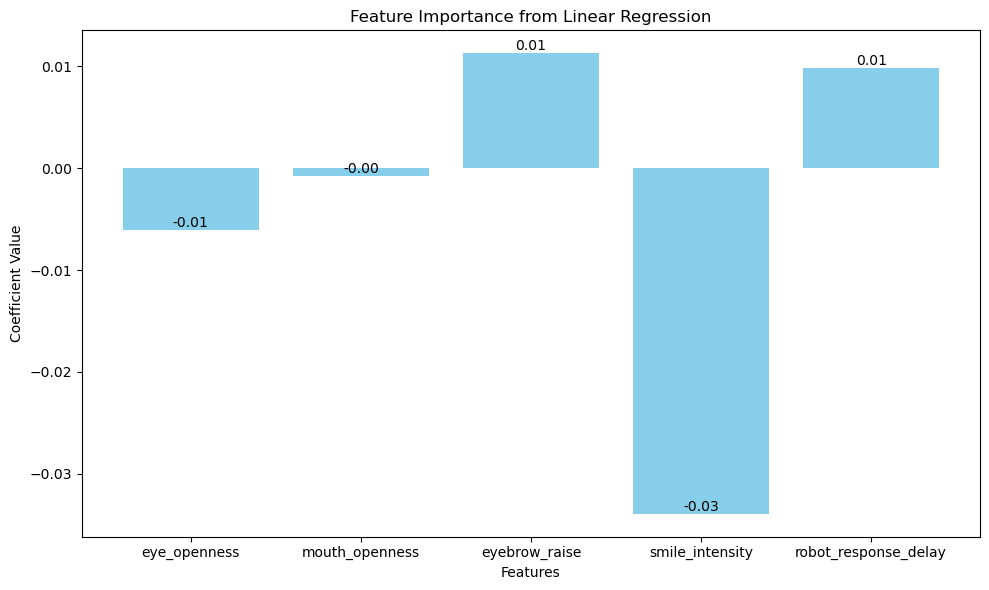

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import joblib
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_excel("D:\\Python project\\facial_expression_dataset.xlsx")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Preprocessing
df.fillna(df.mean(numeric_only=True), inplace=True)
le = LabelEncoder()
df['expression'] = le.fit_transform(df['expression'])

# Drop non-feature columns
X = df.drop(columns=['timestamp', 'face_id', 'expression'])
y = df['expression']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_model = LogisticRegression(C=1.0, max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_model.fit(X_train, y_train)

# Predictions
log_pred = log_model.predict(X_test)
log_prob = log_model.predict_proba(X_test)

# Accuracy and report
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, log_pred))

# Save model
joblib.dump(log_model, "facial_expression_model.pkl")

# Plot the distribution of target labels (facial expressions)
plt.figure(figsize=(6, 4))

sns.countplot(x=y, hue=y, palette="Set2", legend=False)

plt.title("Target Distribution (Facial Expressions)")
plt.xlabel("Expression (Encoded Labels)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# ROC Curve (one vs rest for multiclass)
fpr, tpr, _ = roc_curve(y_test, log_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, log_prob[:, 1], pos_label=1)
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, lw=2)
plt.title("Precision-Recall Curve - Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap
corr = df.drop(columns=['timestamp', 'face_id']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True)
plt.title("Feature Correlation Heatmap with Values")
plt.tight_layout()
plt.show()

# Train a simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Get feature names (if using pandas DataFrame before imputation)
feature_names = ['eye_openness', 'mouth_openness', 'eyebrow_raise', 'smile_intensity', 'robot_response_delay']

# Plotting coefficients as a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, lin_reg.coef_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance from Linear Regression')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


